Ce notebook construit et analyse le réseau de sénateurs dans lequel deux sénateurs sont connectés s'ils sont membres ce la même commission. Vous allez faire le même travail sur les députés

In [5]:
import urllib.request
import json
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Récupération des données

## Liste des commissions

In [2]:
urlAPI='https://www.nossenateurs.fr/organismes/parlementaire/json'

In [3]:
commissionsJSON = urllib.request.urlopen(urlAPI).read()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [6]:
commissions=json.loads(commissionsJSON)['organismes']

In [12]:
commissions

[{'organisme': {'id': 59,
   'slug': 'bureau-du-senat',
   'nom': 'Bureau du Sénat',
   'type': 'parlementaire',
   'url_nossenateurs': 'http://www.nossenateurs.fr/organisme/bureau-du-senat',
   'url_nossenateurs_api': 'http://www.nossenateurs.fr/organisme/bureau-du-senat/json'}},
 {'organisme': {'id': 189,
   'slug': 'comite-de-deontologie-parlementaire-du-senat',
   'nom': 'Comité de déontologie parlementaire du Sénat',
   'type': 'parlementaire',
   'url_nossenateurs': 'http://www.nossenateurs.fr/organisme/comite-de-deontologie-parlementaire-du-senat',
   'url_nossenateurs_api': 'http://www.nossenateurs.fr/organisme/comite-de-deontologie-parlementaire-du-senat/json'}},
 {'organisme': {'id': 738,
   'slug': 'commission-de-l-amenagement-du-territoire-et-du-developpement-durable',
   'nom': "Commission de l'aménagement du territoire et du développement durable",
   'type': 'parlementaire',
   'url_nossenateurs': 'http://www.nossenateurs.fr/organisme/commission-de-l-amenagement-du-terri

Combien y a-t-il de commissions ?

In [4]:
len(commissions)

NameError: name 'commissions' is not defined

## Construction du réseau

In [14]:
net=nx.Graph()

In [16]:
for commission in commissions:    
    membresJSON =  urllib.request.urlopen(commission['organisme']['url_nossenateurs_api']).read()
    membres=json.loads(membresJSON)['senateurs']
    for i in range(len(membres)):
        net.add_node(membres[i]['senateur']['slug'], groupe=membres[i]['senateur']['groupe_sigle'])
    for i in range(len(membres)-1):
        for j in range(i+1, len(membres)):
            net.add_edge(membres[i]['senateur']['slug'], membres[j]['senateur']['slug'])

# Analyses

## Composantes connexes 

In [17]:
nx.components.connected.is_connected(net)

True

## Nombre d'arrêtes

In [19]:
len(net.edges)

34743

Quelle est la densité du réseau ?

## Clustering

In [20]:
nx.algorithms.average_clustering(net)

0.7493227653396439

Quel serait le coefficient de clustering d'un graph aléatoire ayant le meme nombre de noeuds et d'arrêtes ?

## Longueur caractéristique

In [21]:
nx.average_shortest_path_length(net)

1.943786570820363

## Distribution de degrés

Que fait le programme ce dessous ?

In [22]:
plusPetitDegré=100000
for senateur,degré in nx.degree(net):
    if degré < plusPetitDegré:
        senateurAvecLePlusPetitDegré=senateur
        plusPetitDegré=degré

Ecrire un programme qui trouve le parlementaire avec le plus grand degré

In [23]:
degrés=[]
for senateur,degré in nx.degree(net):
    degrés.append(degré)

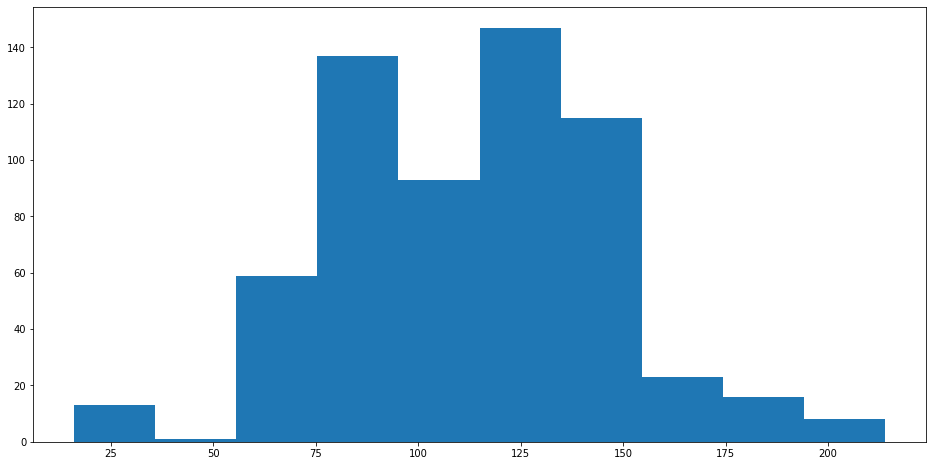

In [24]:
plt.figure(figsize=(16,8))
plt.hist(degrés);

# Sauvegarde du réseau

In [25]:
nx.write_gexf(net, "senateurs.gexf")

On peut à présent ouvrir le réseau dans Gephi